# misura della costante di torsione

In [1]:
# import dati
import numpy as np
import pandas as pd
import os
from interpolazione3 import b_std

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'massa_teta_C.csv'

fr = pd.read_csv(FILE)  # fileread
m = np.array(fr["mg"]) * 0.000001 # kg
teta1 = np.array(fr["teta1"])
teta2 = np.array(fr["teta2"])
teta3 = np.array(fr["teta3"])
teta4 = np.array(fr["teta4"])
teta5 = np.array(fr["teta5"])

teta = np.array([np.average([teta1[i],teta2[i],teta3[i],teta4[i],teta5[i]]) for i in range(0,len(teta1))],dtype=np.float64)
# err media propagato con errore di 1 deg
sigma_teta = np.array([np.sqrt((b_std([teta1[i],teta2[i],teta3[i],teta4[i],teta5[i]])/np.sqrt(5))**2 + 1**2) for i in range(0,len(teta1))],dtype=np.float64) # sigma media

# print(m*1000000,np.round(teta,1),np.round(sigma_teta,1))

teta = teta * np.pi / 180 # rad
sigma_teta = sigma_teta * np.pi / 180

F = m * 9.81

### verifica $\theta \propto F$

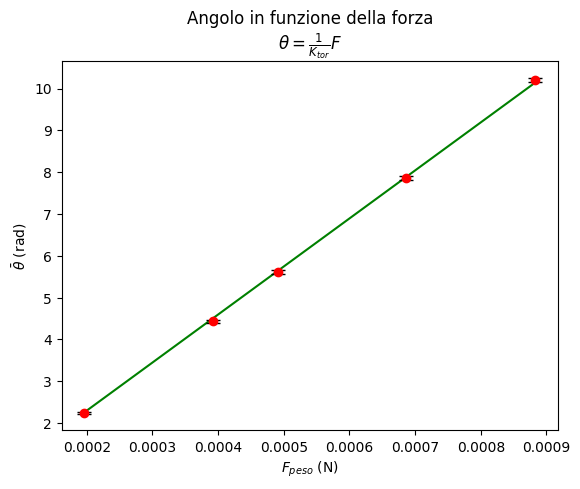


linearità BX
    
B: 11487.504499642846
sigmaB 47.38618737238635

sigmaY: [0.02302247 0.0346438  0.03685911 0.04948863 0.05804368]
chiquadro ridotto: 1.47
df: 4
pvalue: 83.2%
sigmaY medio:  0.04041153617927777


In [2]:
import matplotlib.pyplot as plt
from interpolazione3 import RettaInterpolataB

r = RettaInterpolataB(F,teta,sigma_teta)

plt.title("Angolo in funzione della forza\n$\\theta = \\frac{1}{K_{tor}} F$")
plt.plot(r.x_best, r.y_best, color="green")
plt.errorbar(F,teta,fmt='o',yerr=r.sigmaY, ecolor='black', capsize=5, color="red")
plt.xlabel("$F_{peso}$ (N)")
plt.ylabel("$\\bar{\\theta}$ (rad)")
plt.show()

print(r)
print("sigmaY medio: ",np.average(r.sigmaY))

## misura $K_{torcente}$

$F = K_{tor}\theta \Rightarrow \theta = \frac{F}{K_{tor}} \Rightarrow B = \frac{1}{K_{tor}}$

UDM: $Nrad^{-1}$

In [3]:
from interpolazione3 import final_val

K= 1 / r.B
sigmaK = r.sigmaB / (r.B ** 2)

print('K torcente: ',final_val(K,sigmaK,decimals=2,exp=-6,udm='Nrad-1'))

K torcente:  (87.05 ± 0.36)e-6 Nrad-1
